# Data visualisation for ML4MC summer school

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import *


In [25]:
train_descriptors = pd.read_csv("train_descriptors.csv")
train_mord3d = pd.read_csv("train_mord3d.csv")
train_morgan = pd.read_csv("train_morgan.csv")
train_rdk = pd.read_csv("train_rdk.csv")

train_crystals = pd.read_csv("train_crystals.csv")
train_distances = pd.read_csv("train_distances.csv")
train_centroid_distances = pd.read_csv("train_centroid_distances.csv")

In [26]:
test_descriptors = pd.read_csv("test_descriptors.csv")
test_mord3d = pd.read_csv("test_mord3d.csv")
test_morgan = pd.read_csv("test_morgan.csv")
test_rdk = pd.read_csv("test_rdk.csv")

### Data exploration
Plotting regression targets and looking class sizes in classification targets to get an idea of what the data look like

In [75]:
print(train_crystals.columns)
print(train_centroid_distances.columns)
print(train_distances.columns)

Index(['identifiers', 'n_heavy_atoms', 'smiles', 'a', 'b', 'c', 'alpha',
       'beta', 'gamma', 'z_value', 'z_prime', 'spacegroup_symbol',
       'cell_volume', 'calculated_density', 'packing_coefficient',
       'void_volume', 'is_centrosymmetric', 'is_sohncke', 'vdw_inter',
       'vdw_intra', 'hbond_inter', 'hbond_intra'],
      dtype='object')
Index(['identifiers', 'min', 'max', 'mean', 'mode', 'median', 'std',
       'percentile_25', 'percentile_75'],
      dtype='object')
Index(['identifiers', 'min', 'max', 'mean', 'mode', 'median', 'std',
       'n_vdw_contacts', 'percentile_25', 'percentile_75'],
      dtype='object')


#### Task 1
Density of crystal structure (column: ‘calculated_density’) - regression

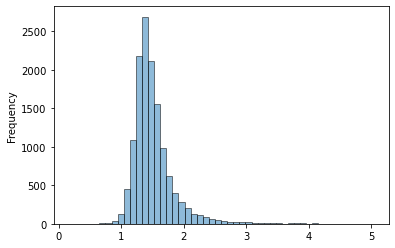

In [52]:
# Distribution of densities
train_crystals['calculated_density'].plot.hist(bins = 50, alpha = 0.5, ec='black')
plt.show()

#### Task 2
Is centrosymmetric (column: ‘is_centrosymmetric’) - categorisation

In [62]:
train_crystals['is_centrosymmetric'].value_counts()

True     10811
False     2638
Name: is_centrosymmetric, dtype: int64

#### Task 3
Mean of centroid distances in packing shells (column: ‘mean’ in train_centroid_distances.csv) - regression

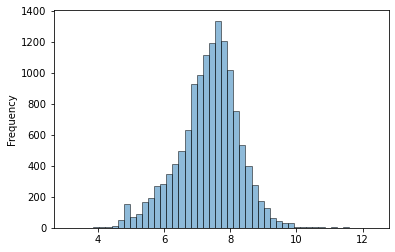

In [66]:
# Distribution of centroid distances
train_centroid_distances['mean'].plot.hist(bins = 50, alpha = 0.5, ec='black')
plt.show()

#### Task 4
Number of van der Waals contacts from atom distances (column:’n_vdw_contacts’ in train_distances.csv) - regression

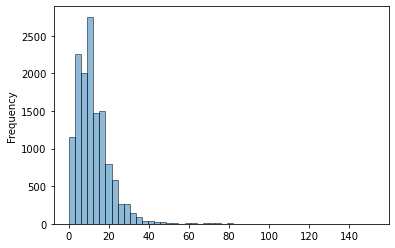

In [69]:
# Distribution of VdW contacts
train_distances['n_vdw_contacts'].plot.hist(bins = 50, alpha = 0.5, ec='black')
plt.show()

### Side tasks
* Packing coefficient of crystal structure (column: ‘packing_coefficient’) - regression
* Cell volume (column: ‘cell_volume’) - regression
* Space group symbol (column: ‘spacegroup_symbol’) - categorisation

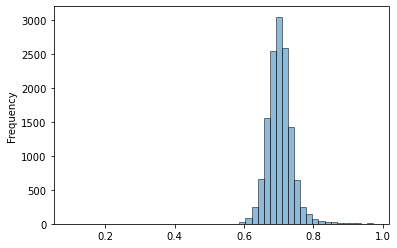

In [76]:
train_crystals['packing_coefficient'].plot.hist(bins = 50, alpha = 0.5, ec='black')
plt.show()

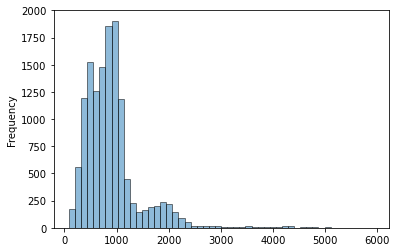

In [77]:
train_crystals['cell_volume'].plot.hist(bins = 50, alpha = 0.5, ec='black')
plt.show()

In [83]:
# 147 space groups represented
train_crystals['spacegroup_symbol'].value_counts()

P21/c      4006
P21/n      2298
P-1        1372
Pbca        953
P212121     858
           ... 
P42/mbc       1
I-43d         1
Ic            1
Ibca          1
P4322         1
Name: spacegroup_symbol, Length: 147, dtype: int64

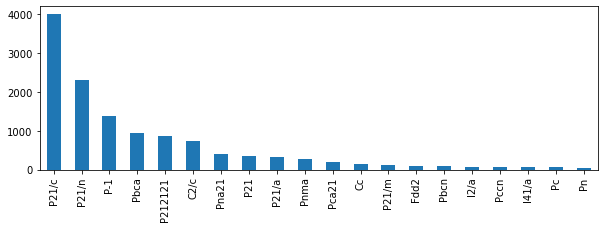

In [94]:
# limit it to the top x
x = 20
train_crystals['spacegroup_symbol'].value_counts()[:x].plot.bar(figsize=(10,3))
plt.show()

### More side tasks
* Z prime (column: ‘z_prime’) - regression/categorisation
* Number of inter/intra-molecular vdw interactions (columns: ‘vdw_inter’, ‘vdw_intra’) - regression
* Number of inter/intra-molecular H bonds (columns: ‘hbond_inter’, ‘hbond_intra’) - regression
* Distribution of atom distances (columns: ‘min’, ‘max’, ‘mode’, ... in train_distances.csv) - regression
* Distribution of centroid distances (columns: ‘min’, ‘max’, ‘mode’, … in train_centroid_distances.csv) - regression

In [97]:
train_crystals['z_prime'].value_counts()

1.00    11480
0.50     1777
0.25      105
0.17       32
0.33       29
0.04       18
0.13        5
2.00        3
Name: z_prime, dtype: int64

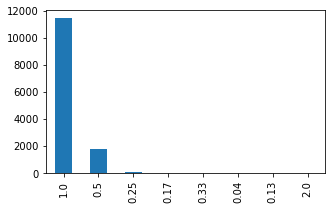

In [98]:
train_crystals['z_prime'].value_counts().plot.bar(figsize=(5,3))
plt.show()

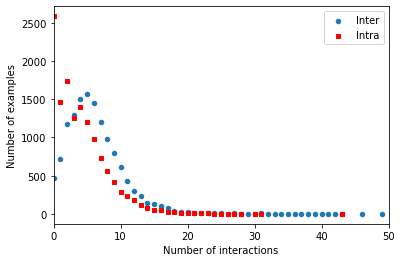

In [137]:
vdw_inter = pd.DataFrame(train_crystals['vdw_inter'].value_counts()).reset_index()
vdw_intra = pd.DataFrame(train_crystals['vdw_intra'].value_counts()).reset_index()
ax = vdw_inter.plot.scatter(x = 'index', y = 'vdw_inter')
vdw_intra.plot.scatter(x = 'index', y = 'vdw_intra', ax=ax, color = 'r', marker ='s')
plt.xlim(0, 50) # there are only a small number of datapoints above 50
plt.xlabel('Number of interactions')
plt.ylabel('Number of examples')
plt.legend(['Inter', 'Intra'])
plt.show()

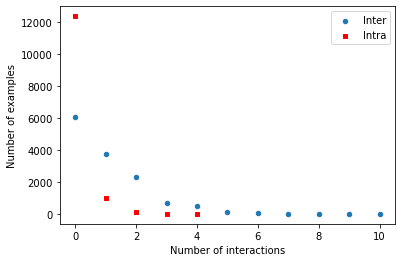

In [139]:
hbond_inter = pd.DataFrame(train_crystals['hbond_inter'].value_counts()).reset_index()
hbond_intra = pd.DataFrame(train_crystals['hbond_intra'].value_counts()).reset_index()
ax = hbond_inter.plot.scatter(x = 'index', y = 'hbond_inter')
hbond_intra.plot.scatter(x = 'index', y = 'hbond_intra', ax=ax, color = 'r', marker ='s')

plt.xlabel('Number of interactions')
plt.ylabel('Number of examples')
plt.legend(['Inter', 'Intra'])
plt.show()

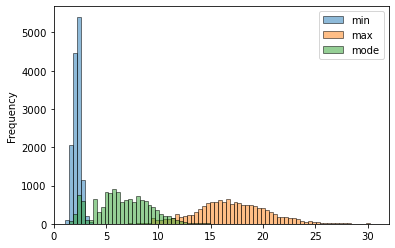

In [153]:
train_distances[['min', 'max', 'mode']].plot.hist(bins = 100, alpha = 0.5, ec='black')
plt.xlim(0,32)
# plt.yscale('log')
plt.show()

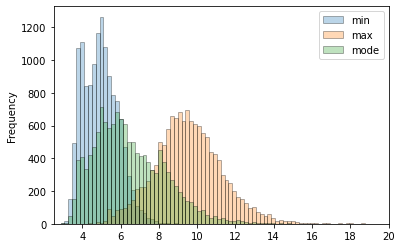

In [160]:
train_centroid_distances[['min', 'max', 'mode']].plot.hist(bins = 100, alpha = 0.3, ec='black')
plt.xlim(2.5,20)
# plt.yscale('log')
plt.show()